# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation
import json

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
btc_amount = 1.2
eth_amount = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=USD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=USD"

In [5]:
# Fetch current BTC price
btc_response = requests.get(btc_url)
btc_data = btc_response.json()

# Fetch current ETH price
eth_response = requests.get(eth_url)
eth_data = eth_response.json()

# json.dumps to visualize the data more easily
# print(json.dumps(btc_data, indent= 6))
# print(json.dumps(eth_data, indent= 6))

# Extracting current price of each coin from data
btc_price = btc_data["data"]["1"]["quotes"]["USD"]["price"]
eth_price = eth_data["data"]["1027"]["quotes"]["USD"]["price"]

# Compute current value of crypto by multiplying price by amount
btc_value = btc_price * btc_amount
eth_value = eth_price * eth_amount

# Compute total crypto amount
crypto_value = btc_value + eth_value

# Print current crypto balances
print(f"The current value of your {btc_amount} BTC is ${btc_value:0.2f}")
print(f"The current value of your {eth_amount} ETH is ${eth_value:0.2f}")
print(f"The current value of your crypto wallet is ${crypto_value:0.2f}")

The current value of your 1.2 BTC is $27504.00
The current value of your 5.3 ETH is $8344.48
The current value of your crypto wallet is $35848.48


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [6]:
# Set current amount of shares
agg_shares = 200
spy_shares = 110

In [7]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2"
)

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [8]:
# Format current date as ISO format
today = pd.Timestamp(
    "2023-01-30", 
    tz="America/New_York"
).isoformat()

# Set the tickers
tickers = ["SPY", "AGG"]

# Set timeframe to "1Day" for Alpaca API
timeframe = "1Day"

# Get current closing prices for SPY and AGG
stock_price_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = today,
    end = today
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_price_df[stock_price_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = stock_price_df[stock_price_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
stock_price_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Preview DataFrame
stock_price_df.head()

SPY                                    \
                            open    high     low   close    volume   
timestamp                                                            
2023-01-30 05:00:00+00:00  402.8  405.13  400.28  400.59  74202018   

                                                    AGG                  \
                          trade_count        vwap  open      high   low   
timestamp                                                                 
2023-01-30 05:00:00+00:00      514525  402.226339  99.9  100.0904  99.8   

                                                                  
                           close   volume trade_count       vwap  
timestamp                                                         
2023-01-30 05:00:00+00:00  99.81  6822012       25026  99.892925

In [9]:
# Pick AGG and SPY close prices
spy_close_price = stock_price_df["SPY"]["close"]
agg_close_price = stock_price_df["AGG"]["close"]

# Convert data to float
spy_close_price = float(spy_close_price)
agg_close_price = float(agg_close_price)

# Print AGG and SPY close prices
print(f"Current SPY closing price: ${spy_close_price}")
print(f"Current AGG closing price: ${agg_close_price}")

Current SPY closing price: $400.59
Current AGG closing price: $99.81


In [10]:
# Compute the current value of shares
spy_value = spy_shares * spy_close_price
agg_value = agg_shares * agg_close_price

# Compute the current value of portfolio
portfolio_value = agg_value + spy_value

# Print current value of shares
print(f"The current value of your {spy_shares} SPY shares is ${spy_value:0.2f}")
print(f"The current value of your {agg_shares} AGG shares is ${agg_value:0.2f}")
print(f"The current value of your portfolio is ${portfolio_value:0.2f}")

The current value of your 110 SPY shares is $44064.90
The current value of your 200 AGG shares is $19962.00
The current value of your portfolio is $64026.90


### Savings Health Analysis

In [11]:
# Set monthly household income
monthly_income = 12000

# Consolidate financial assets data
total_assets = crypto_value + portfolio_value
print(f"Total current value of all financial assets is ${total_assets:.2f}")

# Create savings DataFrame
savings_data = [crypto_value, portfolio_value]
savings_df = pd.DataFrame(
    savings_data,
    columns= ["Amount"],
    index= ["crypto", "stock/bond"] 
)

# Display savings DataFrame
display(savings_df)

Total current value of all financial assets is $99875.38


,Amount
crypto,35848.479
stock/bond,64026.900


<AxesSubplot:title={'center':'Savings Data'}, ylabel='% Amount'>

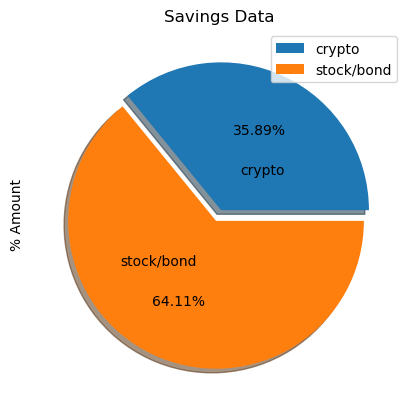

In [12]:
# Plot savings pie chart
explode_data = [.03, .05]
savings_df_plot = savings_df.plot.pie(
    y="Amount", 
    shadow=True, 
    explode=explode_data, 
    labeldistance=.3, 
    title="Savings Data", 
    autopct="%1.2f%%", 
    ylabel="% Amount"
)
savings_df_plot

In [13]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# function to handle if total assets are enough to start an emergency fund
def enough_funds():
    if (total_assets > emergency_fund):
        print(f"Congrats! Your total assets of ${total_assets:.2f} are enough to start an emergency fund of ${emergency_fund:.2f}")
    elif (total_assets == emergency_fund):
        print(f"Congrats! Your total assets of ${total_assets:.2f} are equal to the amount needed to start an emergency fund")
    elif (total_assets < emergency_fund):
        # calculating the needed funds to start a fund
        needed_funds = emergency_fund - total_assets
        print(f"Your assets are almost enough for the amount needed to start an emergency fund, only ${needed_funds:2f} away!!")       

# Validate saving health
enough_funds()

Congrats! Your total assets of $99875.38 are enough to start an emergency fund of $36000.00


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [14]:
# Set start and end dates of ten years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2013-01-30', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2023-01-30', tz='America/New_York').isoformat()

In [15]:
# Get 10 years' worth of historical data for SPY and AGG
# Get current closing prices for SPY and AGG
stock_price_10yr_df = alpaca.get_bars(
    tickers,
    timeframe,
    start = start_date,
    end = end_date
).df

# Reorganize the DataFrame
# Separate ticker data
SPY = stock_price_10yr_df[stock_price_10yr_df["symbol"]=="SPY"].drop("symbol", axis=1)
AGG = stock_price_10yr_df[stock_price_10yr_df["symbol"]=="AGG"].drop("symbol", axis=1)

# Concatenate the ticker DataFrames
stock_price_10yr_df = pd.concat([SPY, AGG], axis=1, keys=["SPY", "AGG"])

# Display sample data
stock_price_10yr_df.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                      AGG                    \
                          trade_count        vwap    open      high     low   
timestamp                                                                     
2015-12-01 05:00:00+00:00      337780  209.921410  108.54  108.8400  108.43   
2015-12-02 05:00:00+00:00      367013  209.563055  108.73  108.7799  108.61   
2015-12-03 05:00:00+00:00      546768  206.878936  108.41  108.4100  107.81   
2015-12-04 05:00:00+00:00      556731  208.178631  108.05  108.3000  108.00   
2015-12-07 05:00:00+00:00      374705  208.276128  108.30  108.5800  108.23   

                                                                     
                             close   volume trade_count        vwap  
timestamp                                                            
2015-12-01 05:00:00+00:00  108.820  4259986       15562  108.754152  
2015-12-02 05:00:00+00:00  108.685  2462787       11581  108.684692  
2015-12-03 05:00:00+00:00  107.890  4634020       16801  108.040315  
2015-12-04 05:00:00+00:00  108.240  2182057        9796  108.192232  
2015-12-07 05:00:00+00:00  108.400  2143773        9104  108.460067

In [16]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30yr_sim = MCSimulation(
    weights=[.6,.4],
    portfolio_data = stock_price_10yr_df,
    num_simulation = 500,
    num_trading_days = 252*30
)

In [17]:
# Printing the simulation input data
MC_stocks_30yr_sim.portfolio_data.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010210  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.013998  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019503  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006059  108.30   

                                                                           \
                               high     low    close   volume trade_count   
timestamp                                                                   
2015-12-01 05:00:00+00:00  108.8400  108.43  108.820  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.685  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.890  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.240  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.400  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001241  
2015-12-03 05:00:00+00:00  108.040315    -0.007315  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [18]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
MC_stocks_30yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Omar\Desktop\Module_05\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.993076,0.999410,1.006804,1.003662,1.006138,1.007478,1.000104,0.986486,0.998265,0.997045,...,1.004040,0.991904,1.007031,0.996822,0.992138,0.999130,1.007599,0.996732,0.992558,1.000213
2,1.002463,1.010783,1.002601,1.011362,0.999595,1.009455,0.987215,0.978887,0.996873,0.999779,...,1.003039,0.987392,0.996656,1.001637,0.992974,0.997897,1.014263,1.003617,0.986360,1.006863
3,1.011995,1.010879,1.003570,1.017510,1.001083,1.007239,0.992856,0.966629,0.980164,0.992121,...,1.011181,0.988896,0.996600,1.010780,0.986704,0.985894,1.013410,1.011389,0.988494,1.011984
4,1.013375,1.002310,1.011141,1.013049,1.016206,1.015926,0.991914,0.963074,0.966977,0.987708,...,1.006071,0.988633,0.996256,1.002836,0.976215,0.987286,1.026663,1.012961,0.983470,1.011151
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,2.183160,2.722473,6.484825,3.979307,7.635341,4.047290,9.339953,2.457586,8.913801,7.178611,...,2.955128,9.635116,6.380112,1.278402,1.275860,7.727038,3.757335,3.289912,8.997954,3.858498
7557,2.175370,2.717907,6.492398,3.997287,7.609713,4.043550,9.379715,2.488930,8.927886,7.112819,...,2.975131,9.605509,6.306279,1.300590,1.277841,7.668777,3.820655,3.319057,9.059331,3.908793
7558,2.175759,2.712306,6.522080,4.000451,7.523182,4.009535,9.421057,2.482279,8.972270,7.144277,...,2.985187,9.604350,6.243511,1.298869,1.296205,7.567132,3.844781,3.293902,9.107545,3.858026
7559,2.148661,2.688496,6.490467,3.988366,7.495149,4.042182,9.451520,2.493360,8.866417,7.147575,...,2.974614,9.617526,6.214721,1.307792,1.286722,7.605573,3.851295,3.346898,9.164777,3.793401


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 7560 Trading Days.'}>

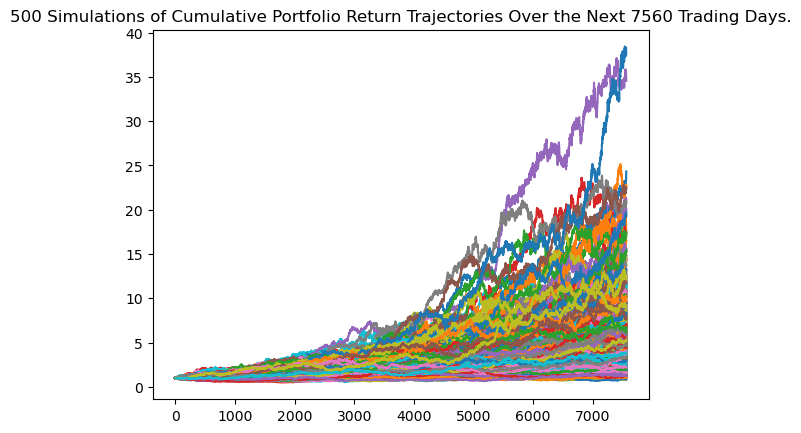

In [19]:
# Plot simulation outcomes
MC_stocks_30yr_sim_cumulative_plot = MC_stocks_30yr_sim.plot_simulation()
MC_stocks_30yr_sim_cumulative_plot

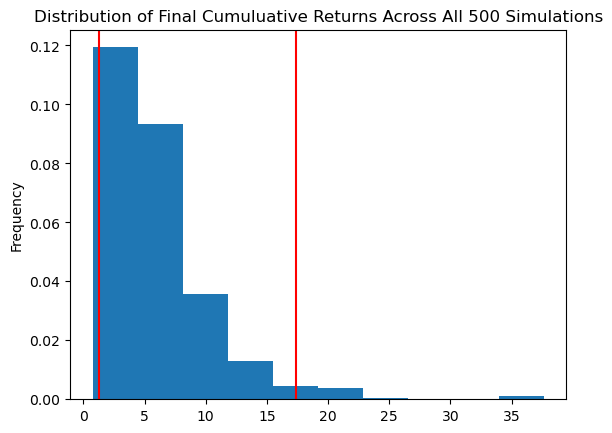

In [20]:
# Plot probability distribution and confidence intervals
MC_stocks_30yr_sim_distribution_plot = MC_stocks_30yr_sim.plot_distribution()

### Retirement Analysis

In [21]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stocks_30yr_sim_summary_stats = MC_stocks_30yr_sim.summarize_cumulative_return()

# Print summary statistics
print(MC_stocks_30yr_sim_summary_stats)

count           500.000000
mean              6.082860
std               4.370357
min               0.769888
25%               3.292349
50%               4.989036
75%               7.713138
max              37.629867
95% CI Lower      1.297999
95% CI Upper     17.395672
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [22]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
MC_stocks_30yr_sim_ci_lower = round(MC_stocks_30yr_sim_summary_stats[8]*initial_investment,2)
MC_stocks_30yr_sim_ci_upper = round(MC_stocks_30yr_sim_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${MC_stocks_30yr_sim_ci_lower} and ${MC_stocks_30yr_sim_ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within the range of $25959.98 and $347913.45


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [23]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
MC_stocks_30yr_sim_ci_lower = round(MC_stocks_30yr_sim_summary_stats[8]*initial_investment,2)
MC_stocks_30yr_sim_ci_upper = round(MC_stocks_30yr_sim_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within the range of"
      f" ${MC_stocks_30yr_sim_ci_lower} and ${MC_stocks_30yr_sim_ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within the range of $38939.97 and $521870.17


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [24]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns, 80% stocks/20% bonds
MC_stocks_5yr_sim = MCSimulation(
    weights=[.8,.2],
    portfolio_data = stock_price_10yr_df,
    num_simulation = 500,
    num_trading_days = 252*5
)
MC_stocks_5yr_sim.portfolio_data.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010210  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.013998  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019503  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006059  108.30   

                                                                           \
                               high     low    close   volume trade_count   
timestamp                                                                   
2015-12-01 05:00:00+00:00  108.8400  108.43  108.820  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.685  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.890  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.240  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.400  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001241  
2015-12-03 05:00:00+00:00  108.040315    -0.007315  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [25]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
MC_stocks_5yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Omar\Desktop\Module_05\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.991634,0.996817,1.010063,1.000004,1.005185,1.000861,1.002560,0.983082,1.008984,0.988807,...,1.000601,0.994972,1.002099,1.007208,1.007186,1.017210,0.995163,1.020864,1.009861,1.001314
2,0.990438,0.999885,1.015999,0.999349,1.016234,0.988928,1.017174,0.980117,0.999130,0.997352,...,1.010909,0.997786,0.995723,1.002953,1.001111,1.020773,0.984533,1.017353,1.030947,0.987444
3,0.995414,0.989217,0.997790,1.014124,1.025937,0.980250,1.008400,0.977849,1.006976,0.990779,...,1.012771,0.999113,0.982899,1.001503,1.019619,1.014118,0.980055,0.994199,1.021833,0.985784
4,0.992604,0.987203,1.013994,1.022556,1.041006,0.971506,0.996021,0.976905,1.002916,0.999064,...,1.020495,0.987479,0.989284,1.001903,1.022025,1.012635,0.993005,0.994927,1.018617,0.981267
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.074744,0.959969,1.289382,0.639133,0.917946,2.336368,1.583270,1.187830,1.431007,1.203415,...,1.174613,0.782638,0.868396,0.918971,1.248747,1.815779,1.537770,0.855716,1.491852,1.939615
1257,2.093667,0.970799,1.279057,0.659774,0.914214,2.373231,1.584723,1.199848,1.432335,1.207121,...,1.160032,0.797616,0.870852,0.921819,1.253426,1.826197,1.537816,0.863011,1.495002,1.936414
1258,2.086276,0.957947,1.273105,0.659347,0.916914,2.404020,1.599722,1.205456,1.441373,1.191791,...,1.160858,0.801793,0.867732,0.911617,1.252367,1.837110,1.545868,0.859119,1.498136,1.901558
1259,2.112007,0.962612,1.254300,0.651700,0.934463,2.408106,1.595578,1.190508,1.418105,1.189115,...,1.166527,0.802173,0.867026,0.918449,1.239013,1.869622,1.555911,0.874293,1.506671,1.879075


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 1260 Trading Days.'}>

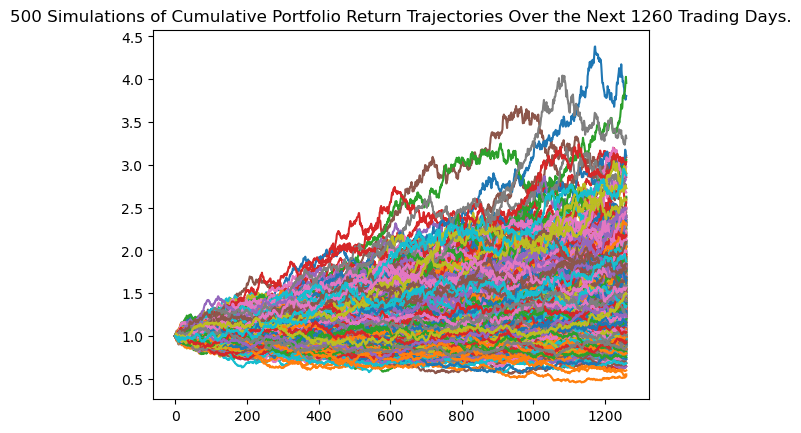

In [26]:
# Plot simulation outcomes
MC_stocks_5yr_sim_cumulative_plot = MC_stocks_5yr_sim.plot_simulation()
MC_stocks_5yr_sim_cumulative_plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

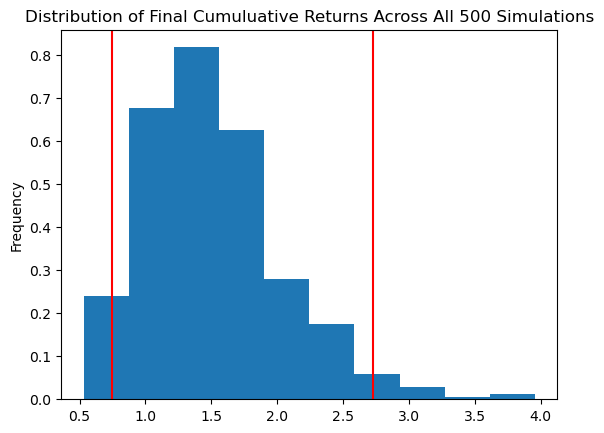

In [27]:
# Plot probability distribution and confidence intervals
MC_stocks_5yr_sim_distribution_plot = MC_stocks_5yr_sim.plot_distribution()
MC_stocks_5yr_sim_distribution_plot

In [28]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stocks_5yr_sim_summary_stats = MC_stocks_5yr_sim.summarize_cumulative_return()

# Print summary statistics
print(MC_stocks_5yr_sim_summary_stats)

count           500.000000
mean              1.508198
std               0.524760
min               0.533421
25%               1.103361
50%               1.428230
75%               1.781582
max               3.956665
95% CI Lower      0.749324
95% CI Upper      2.727676
Name: 1260, dtype: float64


In [29]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
MC_stocks_5yr_sim_ci_lower = round(MC_stocks_5yr_sim_summary_stats[8]*initial_investment,2)
MC_stocks_5yr_sim_ci_upper = round(MC_stocks_5yr_sim_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within the range of"
      f" ${MC_stocks_5yr_sim_ci_lower} and ${MC_stocks_5yr_sim_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 5 years will end within the range of $44959.43 and $163660.54


### Ten Years Retirement Option

In [30]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10yr_sim = MCSimulation(
    weights=[.8,.2],
    portfolio_data = stock_price_10yr_df,
    num_simulation = 500,
    num_trading_days = 252*10
)
MC_stocks_10yr_sim.portfolio_data.head()

SPY                                          \
                              open      high       low    close     volume   
timestamp                                                                    
2015-12-01 05:00:00+00:00  209.440  210.8200  209.1100  210.680   97858418   
2015-12-02 05:00:00+00:00  210.615  211.0000  208.2300  208.529  108069059   
2015-12-03 05:00:00+00:00  208.830  209.1500  204.7511  205.610  166224154   
2015-12-04 05:00:00+00:00  206.080  209.9700  205.9300  209.620  192878747   
2015-12-07 05:00:00+00:00  209.230  209.7295  207.2000  208.350  102027111   

                                                                   AGG  \
                          trade_count        vwap daily_return    open   
timestamp                                                                
2015-12-01 05:00:00+00:00      337780  209.921410          NaN  108.54   
2015-12-02 05:00:00+00:00      367013  209.563055    -0.010210  108.73   
2015-12-03 05:00:00+00:00      546768  206.878936    -0.013998  108.41   
2015-12-04 05:00:00+00:00      556731  208.178631     0.019503  108.05   
2015-12-07 05:00:00+00:00      374705  208.276128    -0.006059  108.30   

                                                                           \
                               high     low    close   volume trade_count   
timestamp                                                                   
2015-12-01 05:00:00+00:00  108.8400  108.43  108.820  4259986       15562   
2015-12-02 05:00:00+00:00  108.7799  108.61  108.685  2462787       11581   
2015-12-03 05:00:00+00:00  108.4100  107.81  107.890  4634020       16801   
2015-12-04 05:00:00+00:00  108.3000  108.00  108.240  2182057        9796   
2015-12-07 05:00:00+00:00  108.5800  108.23  108.400  2143773        9104   

                                                    
                                 vwap daily_return  
timestamp                                           
2015-12-01 05:00:00+00:00  108.754152          NaN  
2015-12-02 05:00:00+00:00  108.684692    -0.001241  
2015-12-03 05:00:00+00:00  108.040315    -0.007315  
2015-12-04 05:00:00+00:00  108.192232     0.003244  
2015-12-07 05:00:00+00:00  108.460067     0.001478

In [31]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
MC_stocks_10yr_sim.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.


C:\Users\Omar\Desktop\Module_05\Starter_Code\MCForecastTools.py:117: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  portfolio_cumulative_returns[n] = (1 + sim_df.fillna(0)).cumprod()


Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo simulation number 230.
Running Monte Carlo simulation number 240.
Running Monte Carlo simulation number 250.
Running Monte Carlo simulation number 260.
Running Monte Carlo simulation number 270.
Running Monte Carlo simulation number 280.
Running Monte Carlo simulation number 290.
Running Monte Carlo simulation number 300.
Running Monte Carlo simulation number 310.
Running Monte Carlo simulation number 320.
Running Monte Carlo simulation number 330.
Running Mon

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.990913,1.003972,0.993144,1.002537,1.012542,1.012991,0.990156,1.011095,0.997218,1.007409,...,1.006002,0.986389,1.009873,1.006736,0.995174,1.007495,1.004015,1.009475,1.000383,1.014568
2,0.989112,1.004256,0.988354,1.001975,1.017029,1.030347,0.993409,1.012385,1.001497,0.995837,...,1.011279,0.996077,1.008908,1.011202,0.988596,0.994101,1.009928,1.006832,1.013208,1.020879
3,0.990464,1.014929,0.986262,1.004241,0.993936,1.041673,0.993683,1.026018,0.993225,1.000449,...,1.005289,1.003625,1.013190,1.020059,1.000820,0.992638,1.021647,1.009250,1.009329,1.019878
4,0.989607,1.018607,0.982307,0.998648,1.010742,1.044024,0.995698,1.033816,0.991811,0.986885,...,0.998300,1.010257,1.008666,1.018330,1.003853,0.999606,1.025848,1.000185,1.020366,1.004104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,2.558680,3.891991,1.651048,1.772697,8.398615,2.832032,2.301241,3.486846,1.669243,2.402219,...,1.916514,1.639469,1.010690,3.670973,3.700460,1.924127,0.447143,5.668389,1.571949,1.924295
2517,2.585931,3.914139,1.626889,1.748085,8.620725,2.892740,2.310750,3.442662,1.675910,2.408288,...,1.931400,1.676746,1.008955,3.656530,3.712787,1.911701,0.447859,5.668474,1.597751,1.926100
2518,2.550060,3.930737,1.612189,1.734172,8.601074,2.904496,2.273183,3.466046,1.663413,2.391031,...,1.937712,1.661887,1.007329,3.691731,3.661162,1.925433,0.447310,5.694802,1.614444,1.947463
2519,2.566314,3.903612,1.600178,1.740462,8.781851,2.905480,2.263198,3.525310,1.672268,2.380234,...,1.916678,1.664072,0.996434,3.660788,3.701684,1.946667,0.440707,5.722450,1.620069,1.957226


<AxesSubplot:title={'center':'500 Simulations of Cumulative Portfolio Return Trajectories Over the Next 2520 Trading Days.'}>

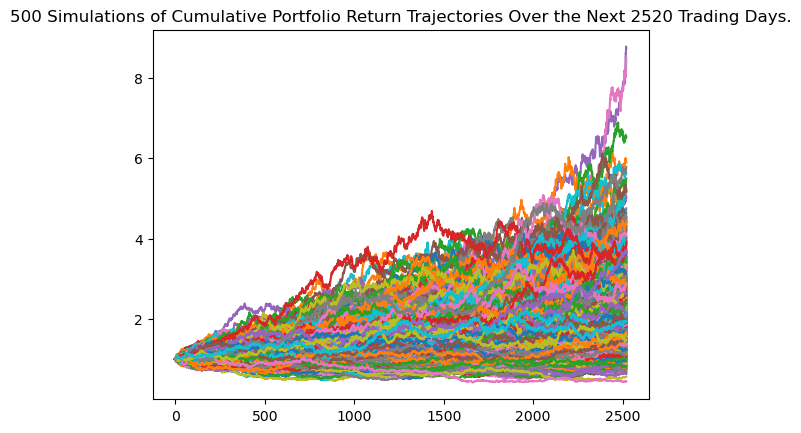

In [32]:
# Plot simulation outcomes
MC_stocks_10yr_sim_cumulative_plot = MC_stocks_10yr_sim.plot_simulation()
MC_stocks_10yr_sim_cumulative_plot

<AxesSubplot:title={'center':'Distribution of Final Cumuluative Returns Across All 500 Simulations'}, ylabel='Frequency'>

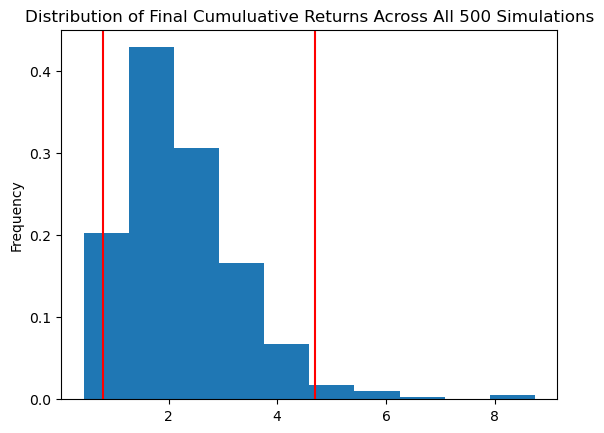

In [33]:
# Plot probability distribution and confidence intervals
MC_stocks_10yr_sim_dist_plot = MC_stocks_10yr_sim.plot_distribution()
MC_stocks_10yr_sim_dist_plot

In [34]:
# Fetch summary statistics from the Monte Carlo simulation results
MC_stocks_10yr_summary_stats = MC_stocks_10yr_sim.summarize_cumulative_return()

# Print summary statistics
print(MC_stocks_10yr_summary_stats)

count           500.000000
mean              2.261937
std               1.097698
min               0.444181
25%               1.476883
50%               2.052894
75%               2.824705
max               8.739348
95% CI Lower      0.795136
95% CI Upper      4.703221
Name: 2520, dtype: float64


In [35]:
# Set initial investment
initial_investment = 20000 * 3

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
MC_stocks_10yr_sim_ci_lower = round(MC_stocks_10yr_summary_stats[8]*initial_investment,2)
MC_stocks_10yr_sim_ci_upper = round(MC_stocks_10yr_summary_stats[9]*initial_investment,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${MC_stocks_10yr_sim_ci_lower} and ${MC_stocks_10yr_sim_ci_upper}")

There is a 95% chance that an initial investment of $60000 in the portfolio over the next 10 years will end within in the range of $47708.19 and $282193.24
